<div style="text-align: center"> 11214369 - Nguyen Vu Anh Ngoc </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# Problem 1
Use `housing.csv`: 
- Calculate Silhouette scores for different number of clusters and choose the most suitable cluster.
- Run the GMM clustering algo. After that you should have cluster for all data samples.
- Use t-SNE to reduce dimension of the original dataset (assigned cluster not included) to 2D.
- Visualize the 2D data with cluster.

In [2]:
# Load housing data
df = pd.read_csv('../data/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Calculate Silhouette scores for different number of clusters and choose the most suitable cluster.

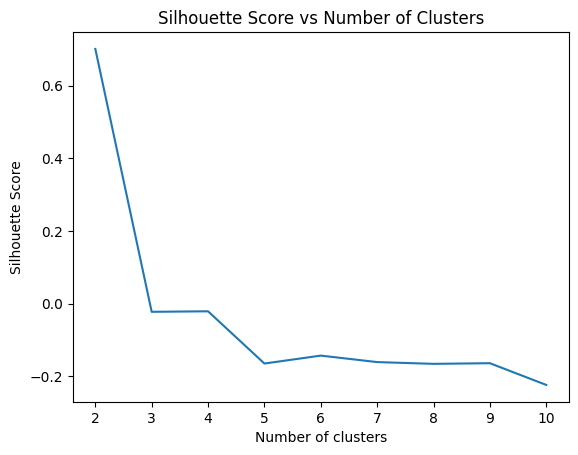

In [3]:
def plot_sillhouette_scores(data, max_clusters=10):
    scores = []
    for i in range(2, max_clusters+1):
        gmm = GaussianMixture(n_components=i)
        gmm.fit(data)
        labels = gmm.predict(data)
        score = silhouette_score(data, labels)
        scores.append(score)
    plt.plot(range(2, max_clusters+1), scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.show()

# Cluster and plot sillhouete scores
X = df
plot_sillhouette_scores(X)

Run the GMM clustering algo. After that you should have cluster for all data samples.

In [4]:
# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Predict the cluster for each data point
y_cluster_gmm = gmm.predict(X)

Use t-SNE to reduce dimension of the original dataset (assigned cluster not included) to 2D.

In [5]:
# Apply TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

Visualize the 2D data with cluster.

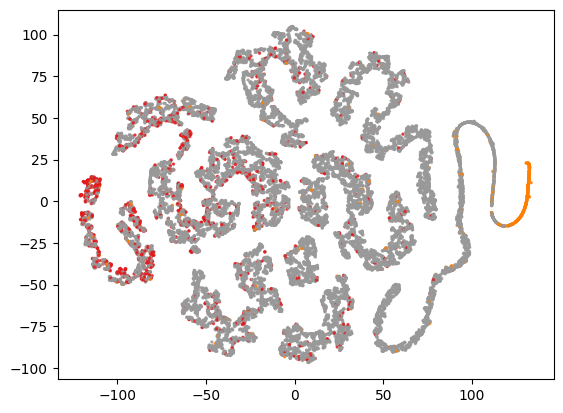

In [6]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_cluster_gmm, s=2, alpha=0.75, cmap='Set1')
plt.show()

Optional: Scale all features to only one range (example: `[0,1]`) and do the same jobs as question 1. Give comments on the difference between non-scaled and scaled version. 


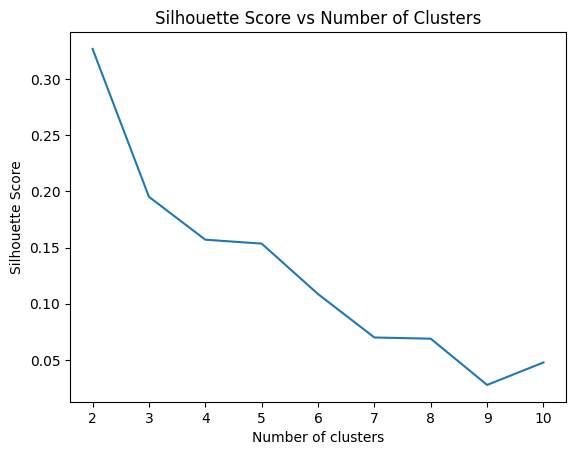

In [7]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Plot sillhouette scores
plot_sillhouette_scores(X_scaled)

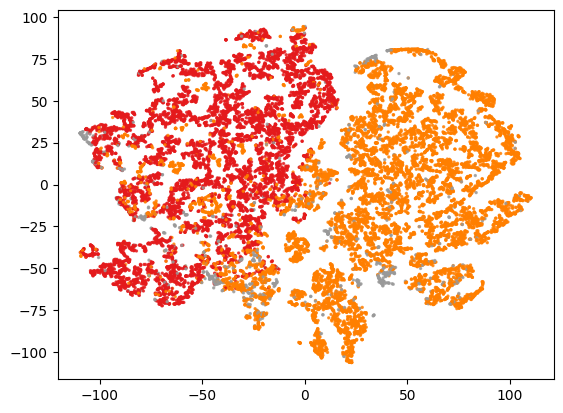

In [8]:
# Fit GMM to the scaled data
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)

# Predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)

# Apply TSNE
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_cluster_gmm, s=2, alpha=0.75, cmap='Set1')
plt.show()

**Scaling features helps GMM clustering.** It ensures all features contribute equally to determining distances between data points, leading to more meaningful cluster assignments. Additionally, scaling improves the estimation of cluster parameters like mean and covariance, leading to more accurate cluster shapes. Finally, scaling can help the training algorithm converge faster and reach better solutions.

# Problem 2. Compare k-means and GMM.

#### K-Means
- **Pros**:
  - Simple and computationally efficient, suitable for large datasets.
  - Easy to interpret and implement, providing clear, distinct clusters.
  - Works well with spherical clusters and is less sensitive to outliers.

- **Cons**:
  - Not guaranteed to converge to global optimum.
  - Requires the number of clusters to be specified beforehand.
  - Assumes equal cluster sizes and spherical clusters, limiting flexibility in cluster shapes.
  - Unable to handle uncertainty of data points near decision boundary.

#### Gaussian Mixture Models (GMM)
- **Pros**:
  - Can identify more complex cluster shapes and accommodate overlapping clusters.
  - Provides soft clustering with probability estimates for data point assignments.
  - Handles clusters of varying sizes and shapes, offering increased flexibility.

- **Cons**:
  - Also not guaranteed to converge to global optimum.
  - Difficult to incorporate categorical variables.
  - More computationally intensive, weak scalability.
  - Sensitive to initialization conditions, potentially leading to varied results on different runs.

# Problem 3

Find 3 examples that GMM is better than k-means.

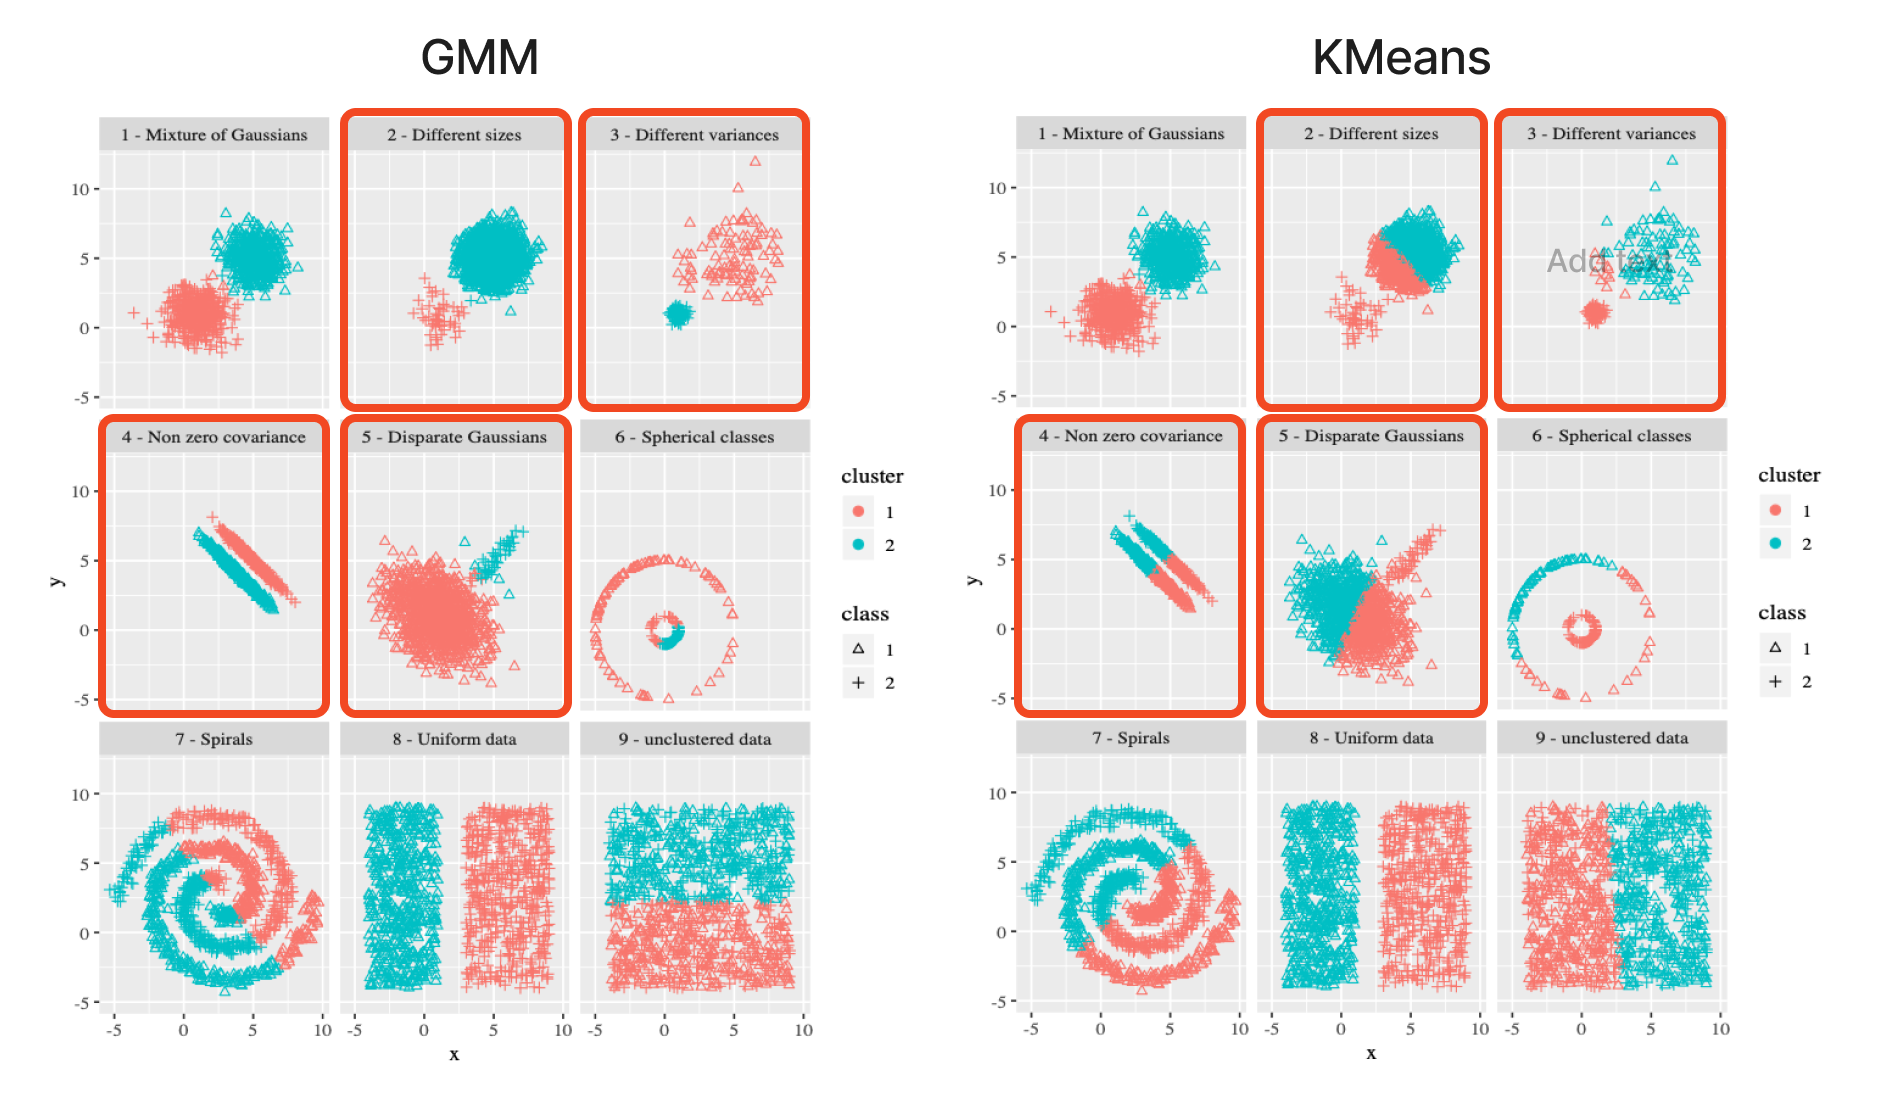